# House Price Prediction

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


### Exploratory Data Analysis and Cleaning

In [2]:
df = pd.read_excel('dataset/house-prices-dataset.xlsx')
df.shape

(18565, 10)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY


In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18565.000000,18565.000000,18565.000000,18565.000000,18376.000000,18565.000000,18565.000000,18565.000000,18565.000000
mean,-119.570116,35.633888,28.615890,2634.033827,537.711199,1426.223108,499.450902,3.867012,206617.794991
std,2.002922,2.137014,12.564224,2195.915548,424.125849,1142.570832,384.553175,1.895988,115447.104881
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1442.000000,295.000000,786.000000,279.000000,2.561200,119300.000000
50%,-118.500000,34.260000,29.000000,2123.000000,434.000000,1166.000000,408.000000,3.534100,179400.000000
75%,-118.010000,37.710000,37.000000,3141.000000,646.000000,1725.000000,603.000000,4.741100,264400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        189
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

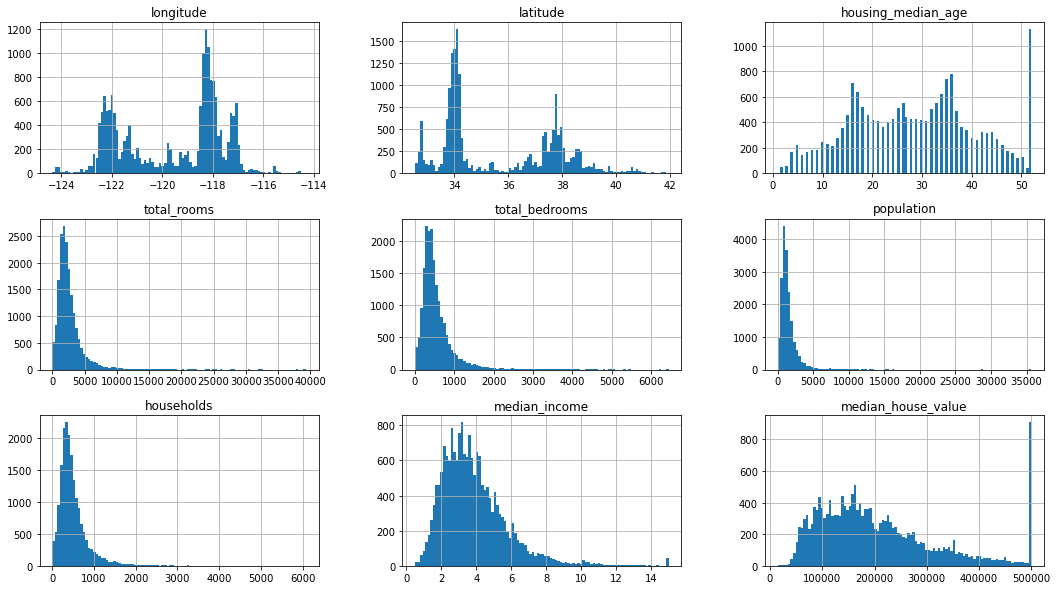

In [7]:
df.hist(bins=100, figsize=(18,10))
plt.show()

In [8]:
df['median_house_value'].describe()

count     18565.000000
mean     206617.794991
std      115447.104881
min       14999.000000
25%      119300.000000
50%      179400.000000
75%      264400.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [9]:
df.drop(df[df.median_house_value > 500000].index, inplace=True)
df.shape

(17697, 10)

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

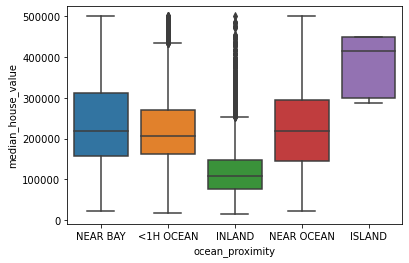

In [10]:
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)

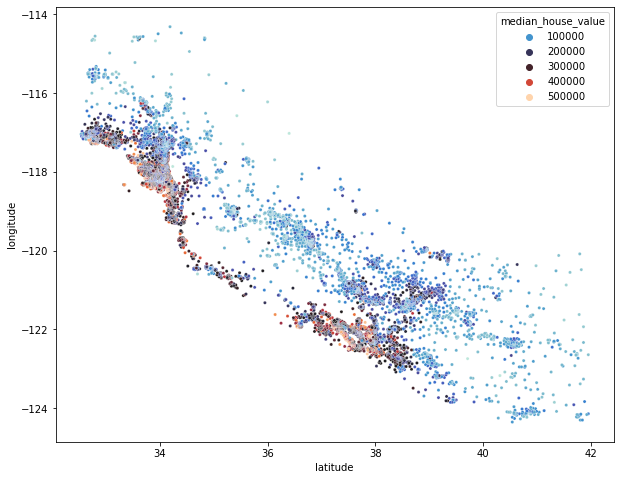

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(x='latitude', y='longitude', data=df, hue='median_house_value', palette='icefire', s=10, ax=ax)
plt.show()

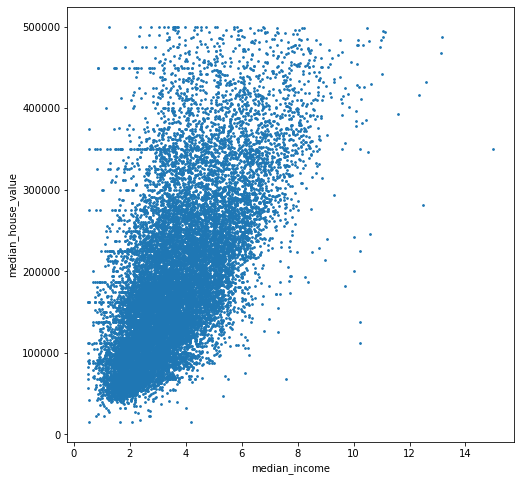

In [12]:
df.plot(kind='scatter', x='median_income', y='median_house_value', s=3, figsize=(8, 8))
plt.show()

In [13]:
df.housing_median_age.describe()

count    17697.000000
mean        28.375035
std         12.489272
min          1.000000
25%         18.000000
50%         28.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [14]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [15]:
df['rooms_per_house'] = df.total_rooms/df.households
df['bedrooms_per_house'] = df.total_bedrooms/df.households
df['pop_per_house'] = df.population/df.households

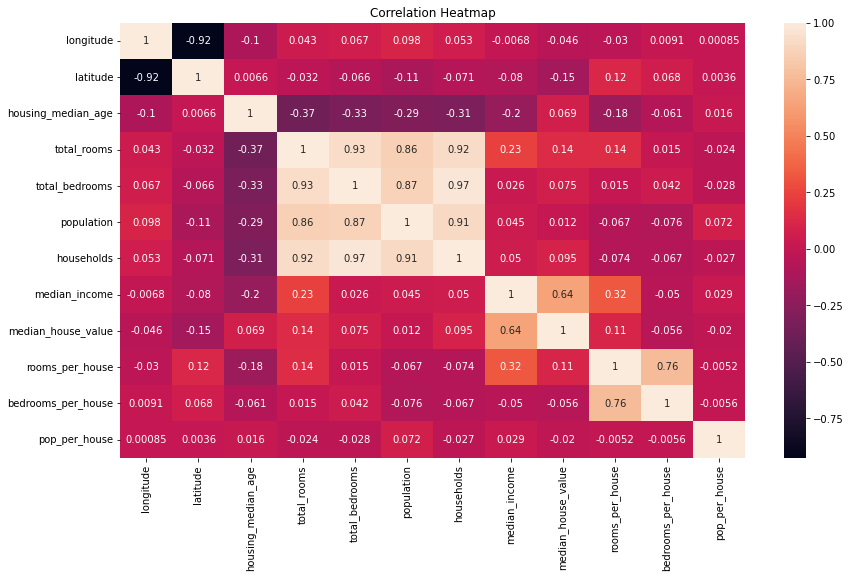

In [16]:
plt.figure(figsize = (14,8))
plt.title('Correlation Heatmap')
corr = sns.heatmap(df.corr(), annot=True)

In [17]:
dummies = pd.get_dummies(df.ocean_proximity)
df = pd.concat([df, dummies], axis=1)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_house,bedrooms_per_house,pop_per_house,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,6.984127,1.023810,2.555556,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,6.238137,0.971880,2.109842,0,0,0,1,0
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,6.281853,1.081081,2.181467,0,0,0,1,0
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY,4.761658,1.103627,2.139896,0,0,0,1,0
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY,4.931907,0.951362,2.128405,0,0,0,1,0


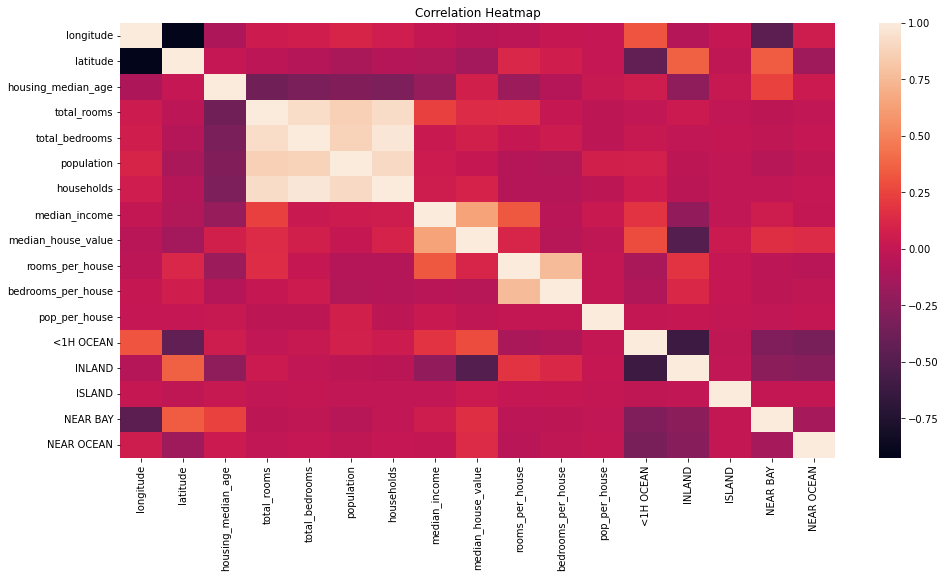

In [18]:
plt.figure(figsize = (16,8))
plt.title('Correlation Heatmap')
corr = sns.heatmap(df.corr())

In [19]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'rooms_per_house',
       'bedrooms_per_house', 'pop_per_house', '<1H OCEAN', 'INLAND', 'ISLAND',
       'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

## Machine Learning

### Segregating dependent and independent variables

In [20]:
X = df.drop(['total_rooms', 'total_bedrooms', 'population', 'median_house_value', 'ocean_proximity', '<1H OCEAN'], axis=1)
print(f'X.shape: {X.shape}')
print(X.head())

X.shape: (17697, 12)
   longitude  latitude  housing_median_age  households  median_income  \
0    -122.23     37.88                  41         126         8.3252   
1    -122.22     37.86                  21        1138         8.3014   
2    -122.25     37.85                  52         259         3.8462   
3    -122.25     37.85                  52         193         4.0368   
4    -122.25     37.84                  52         514         3.6591   

   rooms_per_house  bedrooms_per_house  pop_per_house  INLAND  ISLAND  \
0         6.984127            1.023810       2.555556       0       0   
1         6.238137            0.971880       2.109842       0       0   
2         6.281853            1.081081       2.181467       0       0   
3         4.761658            1.103627       2.139896       0       0   
4         4.931907            0.951362       2.128405       0       0   

   NEAR BAY  NEAR OCEAN  
0         1           0  
1         1           0  
2         1           0

In [21]:
y = df[['median_house_value']]
print(f'y.shape: {y.shape}')
print(y.head())

y.shape: (17697, 1)
   median_house_value
0              452600
1              358500
2              342200
3              269700
4              299200


### Splitting data into train-test sets

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

### Normalizing the data

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
print(f'X_train_scaled.shape: {X_train_scaled.shape}')
print(f'X_test_scaled.shape: {X_test_scaled.shape}')

X_train_scaled.shape: (14157, 12)
X_test_scaled.shape: (3540, 12)


In [25]:
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train)
y_test_scaled = scaler.transform(y_test)

In [26]:
print(f'y_train_scaled.shape: {y_train_scaled.shape}')
print(f'y_test_scaled.shape: {y_test_scaled.shape}')

y_train_scaled.shape: (14157, 1)
y_test_scaled.shape: (3540, 1)


In [27]:
pd.DataFrame(X_train_scaled, columns=X_train.columns).head()

,longitude,latitude,housing_median_age,households,median_income,rooms_per_house,bedrooms_per_house,pop_per_house,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0.303798,-0.682286,-0.990323,-0.534716,-1.077759,0.365504,0.176987,-0.095836,-0.707894,-0.018796,-0.341811,-0.379352
1,1.180166,-1.123251,-1.311504,0.771905,1.633639,0.426600,-1.381559,-0.041018,-0.707894,-0.018796,-0.341811,-0.379352
2,0.532849,-0.761196,-0.347963,1.139312,-0.568490,-1.074171,-0.058344,-0.129852,-0.707894,-0.018796,-0.341811,-0.379352
3,0.343633,-0.148487,-0.669143,-0.645973,-0.994367,-0.001034,-0.223187,-0.008553,1.412642,-0.018796,-0.341811,-0.379352
4,-0.707013,0.928394,0.133808,-0.265630,-1.108614,-0.501817,-0.273900,-0.070222,1.412642,-0.018796,-0.341811,-0.379352


In [28]:
pd.DataFrame(y_train_scaled, columns=y_train.columns).head()

,median_house_value
0,-0.304221
1,1.177208
2,1.017607
3,-0.889427
4,-0.872034


### Model selection

#### Exploring the statsmodels library

In [29]:
import statsmodels.api as sm

In [30]:
X_var = sm.add_constant(X_train_scaled)
y_var = y_train.reset_index()['median_house_value']
model = sm.OLS(y_var, X_var).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1691.
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:38:42   Log-Likelihood:            -1.7645e+05
No. Observations:               14157   AIC:                         3.529e+05
Df Residuals:                   14144   BIC:                         3.530e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.922e+05    526.686    364.991      0.000    1.91e+05    1.93e+05
x1         -4.851e+04   2225.292    -21.799      0.000   -5.29e+04   -4.41e+04
x2         -4.668e+04   2353.060    -19.837      0.000   -5.13e+04   -4.21e+04
x3          1.248e+04    614.788     20.306      0.000    1.13e+04    1.37e+04
x4          8662.3788    565.657     15.314      0.000    7553.617    9771.140
x5          6.279e+04    810.922     77.431      0.000    6.12e+04    6.44e+04
x6          -1.26e+04   1238.125    -10.174      0.000    -1.5e+04   -1.02e+04
x7          1.661e+04   1105.506     15.025      0.000    1.44e+04    1.88e+04
x8         -3816.3609    528.548     -7.220      0.000   -4852.385   -2780.337
x9         -1.715e+04    890.109    -19.264      0.000   -1.89e+04   -1.54e+04
x10         3171.3774    527.398      6.013      0.000    2137.608    4205.146
x11         -531.7540    648.004     -0.821      0.412   -1801.927     738.419
x12         3418.0811    573.832      5.957      0.000    2293.294    4542.868
==============================================================================
Omnibus:                     2973.358   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7444.316
Skew:                           1.155   Prob(JB):                         0.00
Kurtosis:                       5.699   Cond. No.                         9.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Defining a scoring function

In [32]:
def get_scores(X, y_true, model) -> tuple:
    y_pred = model.predict(X)
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    print('r2 score:', r2)
    print('mean squared error:', mse)
    print('root mean squared error:', rmse)
    print('mean absolute error:', mae)
    return (r2, mse, rmse, mae)

In [33]:
def evaluate_model(model, X_scaled: bool = True, y_scaled: bool = False):
    
    print('Evaluating model...')
    
    if X_scaled:
        train_data = X_train_scaled
        test_data = X_test_scaled
    else:
        train_data = X_train
        test_data = X_test
    if y_scaled:
        train_labels = y_train_scaled
        test_labels = y_test_scaled
    else:
        train_labels = y_train
        test_labels = y_test

    print('Train scores:')
    get_scores(train_data, train_labels, model)
    print('Test scores:')
    get_scores(test_data, test_labels, model)

#### Linear Regression

In [34]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [35]:
print(f'coef: {lr.coef_}')
print(f'intercept: {lr.intercept_}')

coef: [[-48509.8455184  -46678.42726814  12483.6318459    8662.37875907
   62790.22694134 -12596.47275045  16610.18028381  -3816.36086324
  -17146.80807111   3171.37740019   -531.75404236   3418.08106051]]
intercept: [192235.60754397]


In [36]:
evaluate_model(lr)

Evaluating model...
Train scores:
r2 score: 0.5893221981298387
mean squared error: 3923524567.5087767
root mean squared error: 62638.04409070239
mean absolute error: 46479.94056516142
Test scores:
r2 score: 0.5368911511578378
mean squared error: 4420772337.47243
root mean squared error: 66488.88882717495
mean absolute error: 46761.30477223686


#### Lasso Regression

In [39]:
lasso = Lasso(alpha=1)
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [40]:
print(f'coef: {lasso.coef_}')
print(f'intercept: {lasso.intercept_}')

coef: [-48480.9716467  -46649.46565414  12482.31442471   8661.41195302
  62785.42004843 -12587.20853495  16600.09172794  -3815.19342123
 -17155.14811508   3170.68334536   -528.78328817   3418.85583596]
intercept: [192235.60754397]


In [41]:
evaluate_model(lasso)

Evaluating model...
Train scores:
r2 score: 0.5893221896826284
mean squared error: 3923524648.2115483
root mean squared error: 62638.04473490171
mean absolute error: 46479.71603070655
Test scores:
r2 score: 0.5369546339818794
mean squared error: 4420166339.307789
root mean squared error: 66484.3315323828
mean absolute error: 46760.45285869225


#### Ridge Regression

In [44]:
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [45]:
print(f'coef: {ridge.coef_}')
print(f'intercept: {ridge.intercept_}')

coef: [[-48401.03541531 -46564.55009375  12484.05543455   8662.96853207
   62782.99208452 -12584.30132512  16593.51604554  -3815.97046616
  -17178.33332738   3172.06165469   -527.55079223   3423.46903179]]
intercept: [192235.60754397]


In [46]:
evaluate_model(ridge)

Evaluating model...
Train scores:
r2 score: 0.589322117656726
mean squared error: 3923525336.3310323
root mean squared error: 62638.05022772526
mean absolute error: 46478.97071300886
Test scores:
r2 score: 0.5370035545610181
mean squared error: 4419699350.297473
root mean squared error: 66480.8194165616
mean absolute error: 46758.9607358752


#### KNN Regression

In [47]:
from sklearn.neighbors import KNeighborsRegressor

##### Selecting the best value of n_neighbors

Elbow method

In [48]:
rmse_vals = []
for k in range(20):
    k = k+1
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_vals.append(rmse)

<AxesSubplot:>

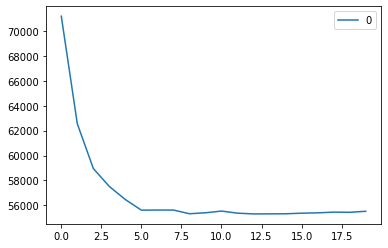

In [49]:
pd.DataFrame(rmse_vals).plot()

GridSearch

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
params = {'n_neighbors': [x for x in range(2,20)]}
model = GridSearchCV(KNeighborsRegressor(), params)

In [52]:
model.fit(X_train_scaled, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19]})

In [53]:
model.best_params_

{'n_neighbors': 14}

In [54]:
model.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsRegressor(),
 'n_jobs': None,
 'param_grid': {'n_neighbors': [2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [55]:
evaluate_model(model)

Evaluating model...
Train scores:
r2 score: 0.7132459112343876
mean squared error: 2739584917.8650665
root mean squared error: 52341.04429475081
mean absolute error: 36569.16290779927
Test scores:
r2 score: 0.6794110397075348
mean squared error: 3060297402.8747363
root mean squared error: 55319.95483435192
mean absolute error: 38697.43343422115


#### Support Vector Regression

In [56]:
from sklearn.svm import SVR

In [57]:
svr = SVR()
svr.fit(X_train_scaled, y_train_scaled.ravel())

SVR()

In [58]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [59]:
evaluate_model(svr, y_scaled=True)

Evaluating model...
Train scores:
r2 score: 0.7188264095152606
mean squared error: 0.28117359048473944
root mean squared error: 0.530258041414498
mean absolute error: 0.3574623487473692
Test scores:
r2 score: 0.7207692819309697
mean squared error: 0.27899930172499227
root mean squared error: 0.5282038448600997
mean absolute error: 0.3597414382863246


In [ ]:
# params = {'kernel': ['linear','poly','rbf','sigmoid'], 'C': [1,5,10], 'coef0':[0,1,5], 'degree':[3,5]}
# model = GridSearchCV(SVR(), params, cv=3, verbose=3)

In [ ]:
# model.fit(X_train_scaled, y_train_scaled.ravel())

In [ ]:
# model.best_params_

#### Decision Tree Regression

In [65]:
from sklearn.tree import DecisionTreeRegressor

In [68]:
tree = DecisionTreeRegressor(min_samples_leaf=25)
tree.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=25)

In [69]:
evaluate_model(tree, X_scaled=False)

Evaluating model...
Train scores:
r2 score: 0.7816865675862933
mean squared error: 2085718077.7527194
root mean squared error: 45669.66255352364
mean absolute error: 31578.274185784656
Test scores:
r2 score: 0.7309137578749543
mean squared error: 2568659654.3229575
root mean squared error: 50681.946039225426
mean absolute error: 35328.60174663322


#### Random Forest Regression

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
params = {
    'n_estimators': [50,100,150],
    'min_samples_leaf': [5,10,25,50],
    'max_features': ['auto','sqrt'],
    'max_samples': [None, 0.7]
}
model = GridSearchCV(RandomForestRegressor(), params)

In [72]:
model.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'max_samples': [None, 0.7],
                         'min_samples_leaf': [5, 10, 25, 50],
                         'n_estimators': [50, 100, 150]})

In [73]:
model.best_params_

{'max_features': 'sqrt',
 'max_samples': None,
 'min_samples_leaf': 5,
 'n_estimators': 150}

In [74]:
model.get_params()

{'cv': None,
 'error_score': nan,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'mse',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_impurity_split': None,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': None,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestRegressor(),
 'n_jobs': None,
 'param_grid': {'n_estimators': [50, 100, 150],
  'min_samples_leaf': [5, 10, 25, 50],
  'max_features': ['auto', 'sqrt'],
  'max_samples': [None, 0.7]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [75]:
evaluate_model(model, X_scaled=False)

Evaluating model...
Train scores:
r2 score: 0.8760214027142187
mean squared error: 1184464000.9294417
root mean squared error: 34416.04278428073
mean absolute error: 23077.160065937278
Test scores:
r2 score: 0.7964239904635859
mean squared error: 1943308131.0833051
root mean squared error: 44082.96871903371
mean absolute error: 30172.411596155584


#### Gradient Boosting Regression

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train.values.ravel())

GradientBoostingRegressor()

In [78]:
evaluate_model(gbr, X_scaled=False)

Evaluating model...
Train scores:
r2 score: 0.7688993516247682
mean squared error: 2207884300.8760858
root mean squared error: 46988.12936131939
mean absolute error: 33175.560198581414
Test scores:
r2 score: 0.7640022126382272
mean squared error: 2252801890.272676
root mean squared error: 47463.69023024522
mean absolute error: 33837.66199251865


In [79]:
params = {
    'learning_rate': [0.5, 0.1],
    'n_estimators': [100, 150, 200],
    'min_samples_leaf': [10, 25, 50]
}
model = GridSearchCV(GradientBoostingRegressor(), params)

In [80]:
model.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.5, 0.1],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [100, 150, 200]})

In [81]:
model.best_params_

{'learning_rate': 0.5, 'min_samples_leaf': 50, 'n_estimators': 200}

In [82]:
evaluate_model(model, X_scaled=False)

Evaluating model...
Train scores:
r2 score: 0.8603436329859377
mean squared error: 1334245933.1705782
root mean squared error: 36527.33131739271
mean absolute error: 25554.046773422666
Test scores:
r2 score: 0.8153539095285922
mean squared error: 1762605769.7218332
root mean squared error: 41983.39873952362
mean absolute error: 29217.486123651986


### Demonstrating Target Scaling Using TransformedTargetRegressor

In [83]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RepeatedKFold

#### Support Vector Regression

In [84]:
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR())])
model = TransformedTargetRegressor(regressor=pipeline, transformer=StandardScaler())
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=2)

In [85]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

In [86]:
np.mean(np.absolute(scores))

36371.34294836579

In [87]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

35162.36197693975

## Deep Learning

### Artificial Neural Network - Multilayer Perceptron

In [88]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import RandomizedSearchCV

In [89]:
def baseline_model(layer1_nodes=256, layer2_nodes=512, layer3_nodes=512, dropout=0.2, learning_rate=0.01):
       
    model = Sequential()
    
    model.add(Dense(layer1_nodes, input_dim=12, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(layer2_nodes, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(layer3_nodes, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(dropout))
    
    model.add(Dense(1, kernel_initializer='normal'))

    model.compile(
        optimizer=Adam(learning_rate=learning_rate), 
        loss='mean_squared_error', 
        metrics=['mse']
    )

    return model

In [90]:
model = KerasRegressor(build_fn=baseline_model, verbose=0)
params = {
    'layer1_nodes': [64, 128],
    'layer2_nodes': [128, 256],
    'layer3_nodes': [128, 256],
    'learning_rate': [0.1, 0.01],
    'batch_size': [16, 32, 64],
    'epochs': [100, 200]
}

C:\Users\saran\AppData\Local\Temp/ipykernel_12844/3970057668.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=baseline_model, verbose=0)


In [91]:
estimator = RandomizedSearchCV(estimator=model, n_iter=10, param_distributions=params, scoring='neg_root_mean_squared_error', cv=3, verbose=3)
history = estimator.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END batch_size=16, epochs=100, layer1_nodes=64, layer2_nodes=128, layer3_nodes=128, learning_rate=0.1;, score=-60515.808 total time= 2.0min
[CV 2/3] END batch_size=16, epochs=100, layer1_nodes=64, layer2_nodes=128, layer3_nodes=128, learning_rate=0.1;, score=-67331.382 total time= 1.8min
[CV 3/3] END batch_size=16, epochs=100, layer1_nodes=64, layer2_nodes=128, layer3_nodes=128, learning_rate=0.1;, score=-63704.379 total time= 1.6min
[CV 1/3] END batch_size=16, epochs=200, layer1_nodes=64, layer2_nodes=256, layer3_nodes=256, learning_rate=0.1;, score=-57792.126 total time= 4.4min
[CV 2/3] END batch_size=16, epochs=200, layer1_nodes=64, layer2_nodes=256, layer3_nodes=256, learning_rate=0.1;, score=-64203.359 total time= 4.3min
[CV 3/3] END batch_size=16, epochs=200, layer1_nodes=64, layer2_nodes=256, layer3_nodes=256, learning_rate=0.1;, score=-58224.269 total time= 4.5min
[CV 1/3] END batch_size=16, epochs=200, layer

In [92]:
print('Best estimator:', estimator.best_estimator_)
print('Best params:', estimator.best_params_)
print('Best score:', estimator.best_score_)

Best estimator: <keras.wrappers.scikit_learn.KerasRegressor object at 0x000002845C62AA30>
Best params: {'learning_rate': 0.01, 'layer3_nodes': 256, 'layer2_nodes': 256, 'layer1_nodes': 64, 'epochs': 200, 'batch_size': 16}
Best score: -48417.83716136846


In [93]:
results = pd.DataFrame(estimator.cv_results_).sort_values('rank_test_score')[['mean_test_score', 'std_test_score', 'params']]

In [94]:
results.head(10)

,mean_test_score,std_test_score,params
2,-48417.837161,1528.146563,"{'learning_rate': 0.01, 'layer3_nodes': 256, '..."
9,-51997.016629,1324.001049,"{'learning_rate': 0.01, 'layer3_nodes': 256, '..."
6,-52092.989333,1793.501415,"{'learning_rate': 0.1, 'layer3_nodes': 256, 'l..."
4,-52227.111832,635.370455,"{'learning_rate': 0.1, 'layer3_nodes': 128, 'l..."
3,-52386.940345,1750.545922,"{'learning_rate': 0.1, 'layer3_nodes': 128, 'l..."
7,-52482.269859,1175.129562,"{'learning_rate': 0.01, 'layer3_nodes': 128, '..."
8,-52495.360241,719.369666,"{'learning_rate': 0.01, 'layer3_nodes': 128, '..."
1,-60073.251137,2925.751049,"{'learning_rate': 0.1, 'layer3_nodes': 256, 'l..."
0,-63850.523110,2784.364995,"{'learning_rate': 0.1, 'layer3_nodes': 128, 'l..."
5,-66131.606162,9491.240014,"{'learning_rate': 0.1, 'layer3_nodes': 128, 'l..."


In [95]:
np.sqrt(mean_squared_error(y_test, estimator.predict(X_test_scaled)))

48574.058924869605

In [96]:
r2_score(y_train, estimator.predict(X_train_scaled))

0.7813998344848415

In [97]:
r2_score(y_test, estimator.predict(X_test_scaled))

0.7528311596674417

In [98]:
evaluate_model(estimator)

Evaluating model...
Train scores:
r2 score: 0.7813998344848415
mean squared error: 2088457462.1624458
root mean squared error: 45699.644004767106
mean absolute error: 33919.664205980254
Test scores:
r2 score: 0.7528311596674417
mean squared error: 2359439200.4367046
root mean squared error: 48574.058924869605
mean absolute error: 35491.478863215045


In [ ]:
# def plot_history(history, key):
#   plt.plot(history.history[key])
#   plt.plot(history.history['val_'+key])
#   plt.xlabel("Epochs")
#   plt.ylabel(key)
#   plt.legend([key, 'val_'+key])
#   plt.show()

# plot_history(history, 'mean_absolute_error')

In [ ]:
# sns.pairplot(X)